In [1]:
'''
泰坦尼克号乘客仓位等级与生还率分析
by Luo Jun QI （SN：2020310987）
'''

import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('titanic_dataset.csv') # 从文件读取原始数据表
data.head() # 显示前几行数据


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500


In [20]:
dfPeople = data[['pclass','name']].groupby(['pclass']).count()
dfSurvived = data[['pclass','survived']].groupby(['pclass']).sum()
df = pd.merge(dfPeople, dfSurvived, on='pclass')
df.rename(columns={'name': 'peopleCount', 'survived': 'survivedCount'}, inplace = True)
df.eval('rated = survivedCount / peopleCount * 100', inplace = True)
df.head()

,peopleCount,survivedCount,rated
pclass,,,
1,323,200,61.919505
2,277,119,42.960289
3,709,181,25.528914


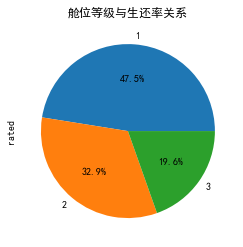

In [28]:
rated = df['rated']

# 设置pyplot属性，使其能正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] # 字体使用黑体字

rated.plot(kind = 'pie',
           autopct='%.1f%%', # 饼图中添加数值标签
           title = '舱位等级与生还率关系', # 为饼图添加标题
          )
# 显示图形
plt.show()
